In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 36 AWG Attenuation

In [9]:
TPdata1=pd.read_csv('TPAIR1.csv')
TPdata2=pd.read_csv('TPAIR2.csv')

In [10]:
list(TPdata1.columns)

['Frequency', 'Attenuation', '! FILETYPE CSV', 'Unnamed: 3']

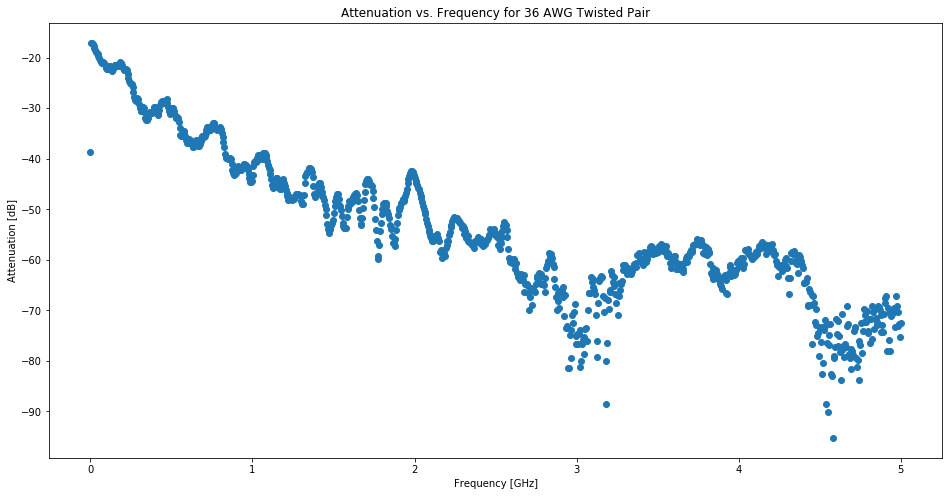

In [13]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*TPdata1['Frequency'],TPdata1['Attenuation'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair')
plt.show()

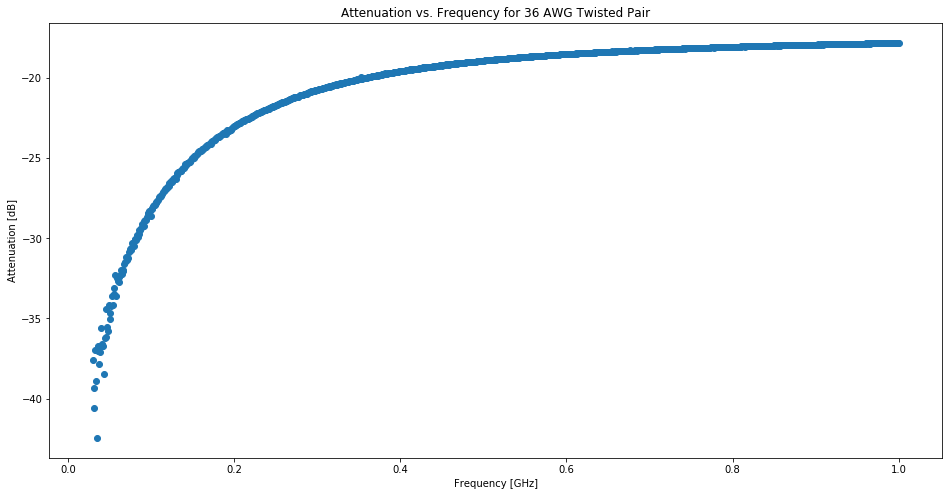

In [15]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*TPdata2['Frequency'],TPdata2['Attenuation'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair')
plt.show()

These two data sets were taken using the 36 AWG twisted pair intended for HV use. On the SA side, both legs have resistor T networks to impedance match with the SA itself. On the other end, one leg is 45 ohm terminated while the other is fed into another T network and finally into the SA reciever. The 32 AWG is still wrapped with the 36, and the 32 AWG has been 50 ohm terminated on either end.

### Correction for the Transformer Characteristics

In [35]:
TFdata=pd.read_csv('Transformer1.csv')
TF2data=pd.read_csv('Transformer2.csv')
Floordata=pd.read_csv('Floor1.csv')

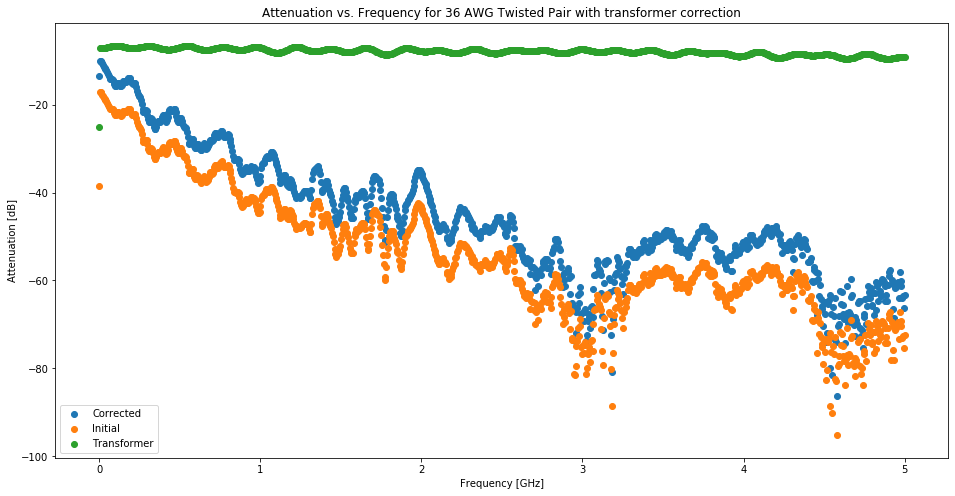

In [36]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*TPdata1['Frequency'],TPdata1['Attenuation']-TFdata['Attenuation'], label='Corrected')
plt.scatter((10.**-9)*TPdata1['Frequency'],TPdata1['Attenuation'],label='Initial')
plt.scatter((10.**-9)*TFdata['Frequency'],TFdata['Attenuation'],label='Transformer')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair with transformer correction')
plt.legend()
plt.show()

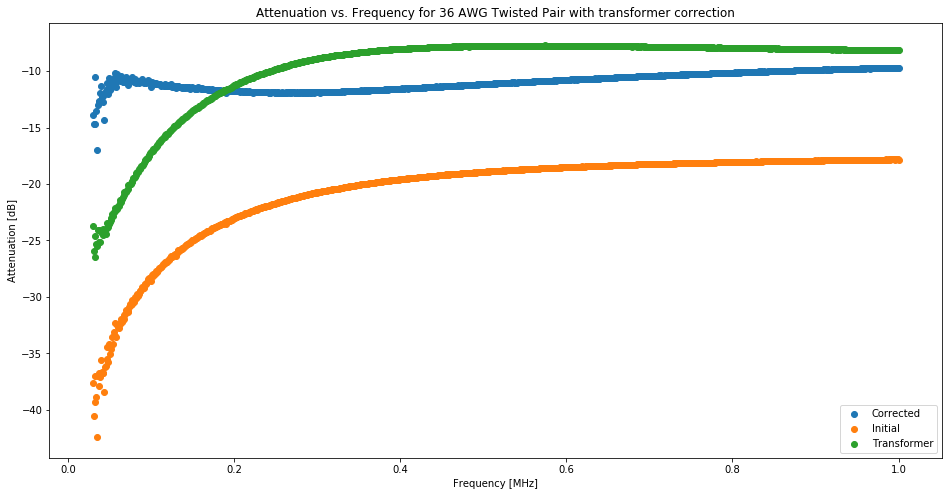

In [37]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*TPdata2['Frequency'],TPdata2['Attenuation']-TF2data['Attenuation'], label='Corrected')
plt.scatter((10.**-6)*TPdata2['Frequency'],TPdata2['Attenuation'],label='Initial')
plt.scatter((10.**-6)*TF2data['Frequency'],TF2data['Attenuation'],label='Transformer')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair with transformer correction')
plt.legend()
plt.show()

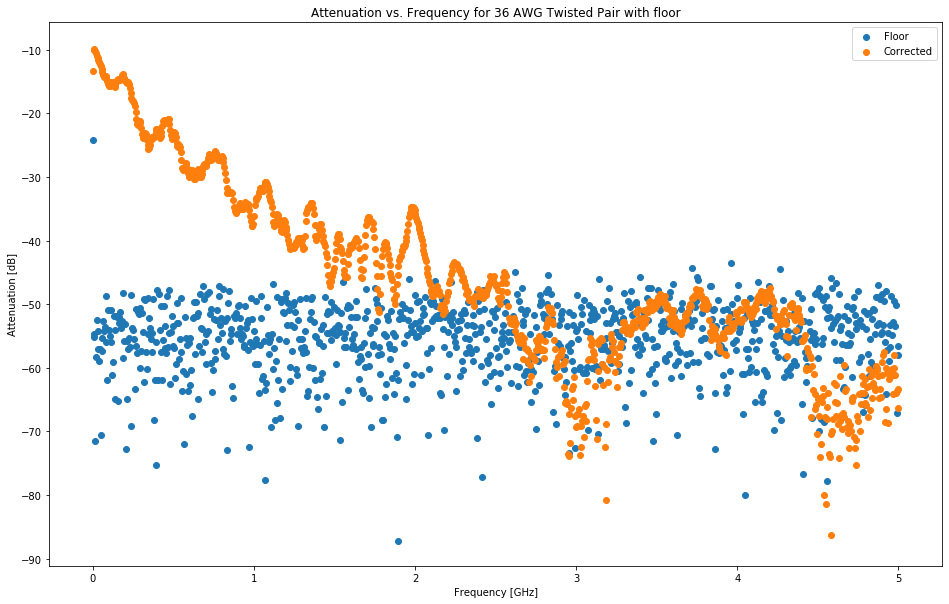

In [46]:
plt.figure(figsize=(16,10))
plt.scatter((10.**-9)*Floordata['Frequency'],Floordata['Attenuation'],label='Floor',zorder=1)
plt.scatter((10.**-9)*TPdata1['Frequency'],TPdata1['Attenuation']-TFdata['Attenuation'], label='Corrected')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair with floor')
plt.legend()
plt.show()

The above plot shows that my floor data measurement was flawed some, as the SA clearly can measure levels of attenuation below what I had thought possible. Likely this is due to the power setting being on high for the corrected measurement, and on low for the floor data measurement. 

In [43]:
Floor3data=pd.read_csv('Floor3.csv')
Floor4data=pd.read_csv('Floor4.csv')

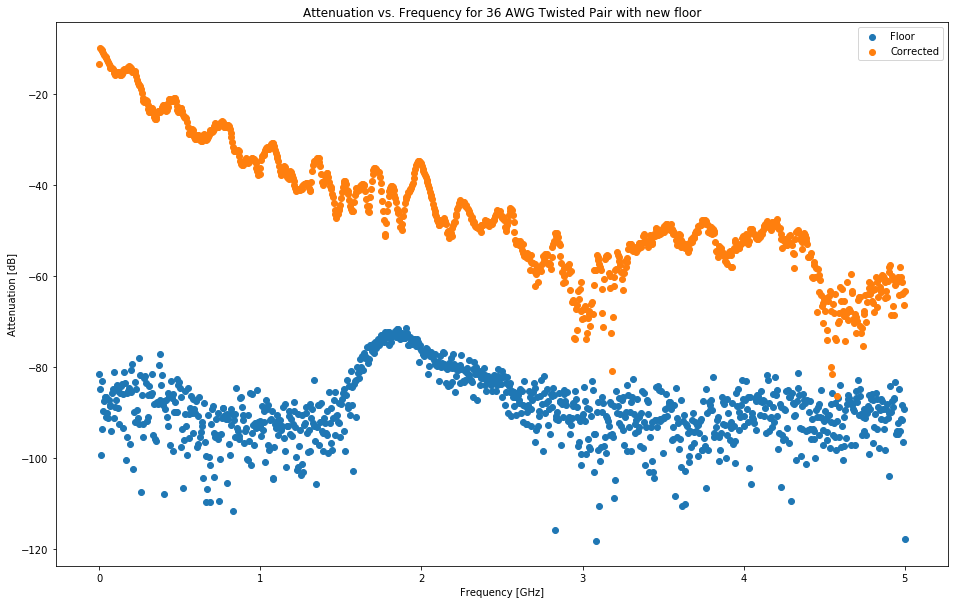

In [47]:
plt.figure(figsize=(16,10))
plt.scatter((10.**-9)*Floor4data['Frequency'],Floor4data['Attenuation'],label='Floor',zorder=1)
plt.scatter((10.**-9)*TPdata1['Frequency'],TPdata1['Attenuation']-TFdata['Attenuation'], label='Corrected')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair with new floor')
plt.legend()
plt.show()

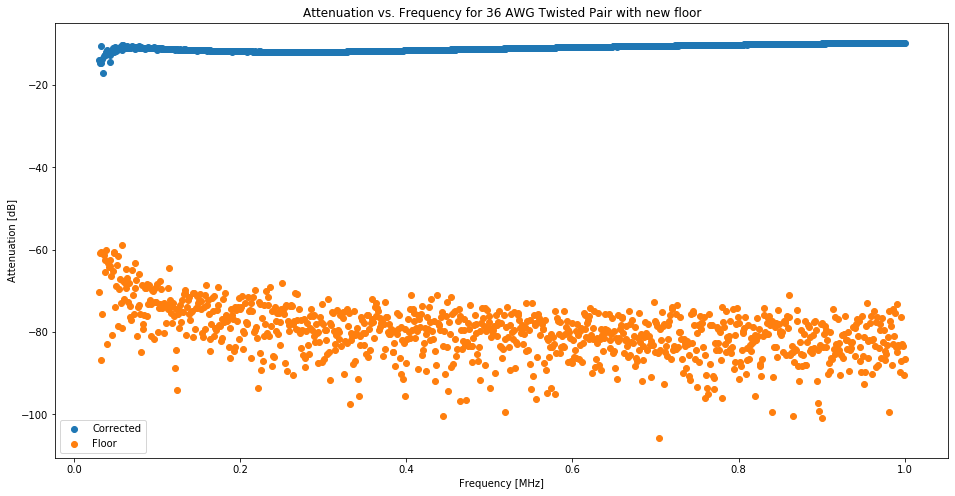

In [48]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*TPdata2['Frequency'],TPdata2['Attenuation']-TF2data['Attenuation'], label='Corrected')
plt.scatter((10.**-6)*Floor3data['Frequency'],Floor3data['Attenuation'],label='Floor',zorder=1)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for 36 AWG Twisted Pair with new floor')
plt.legend()
plt.show()

This plot shows us that the lower frequency twisted pair attenuation is nowhwere near the lowest the SA can measure. For the plot above, we see that with a new floor also measured on the high power setting, the collected data now lies above the floor distribution which is good. This aligns with the idea that the floor measurement is a representation of how low an attenuation the SA can measure due to inherent limitations in the internal circuitry. Compared with the plot before that, we see that power level has a direct correlation with ability to measure lower attenuation levels, meaning we must be careful when selecting this parameter in the future. 